In [5]:
from tensorflow import keras

model = keras.models.load_model("/kaggle/input/best-model-garbage/keras/default/1/best_garbage_model.h5")

In [2]:
# model input shape
print(model.input_shape)

(None, 384, 384, 3)


# Test

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


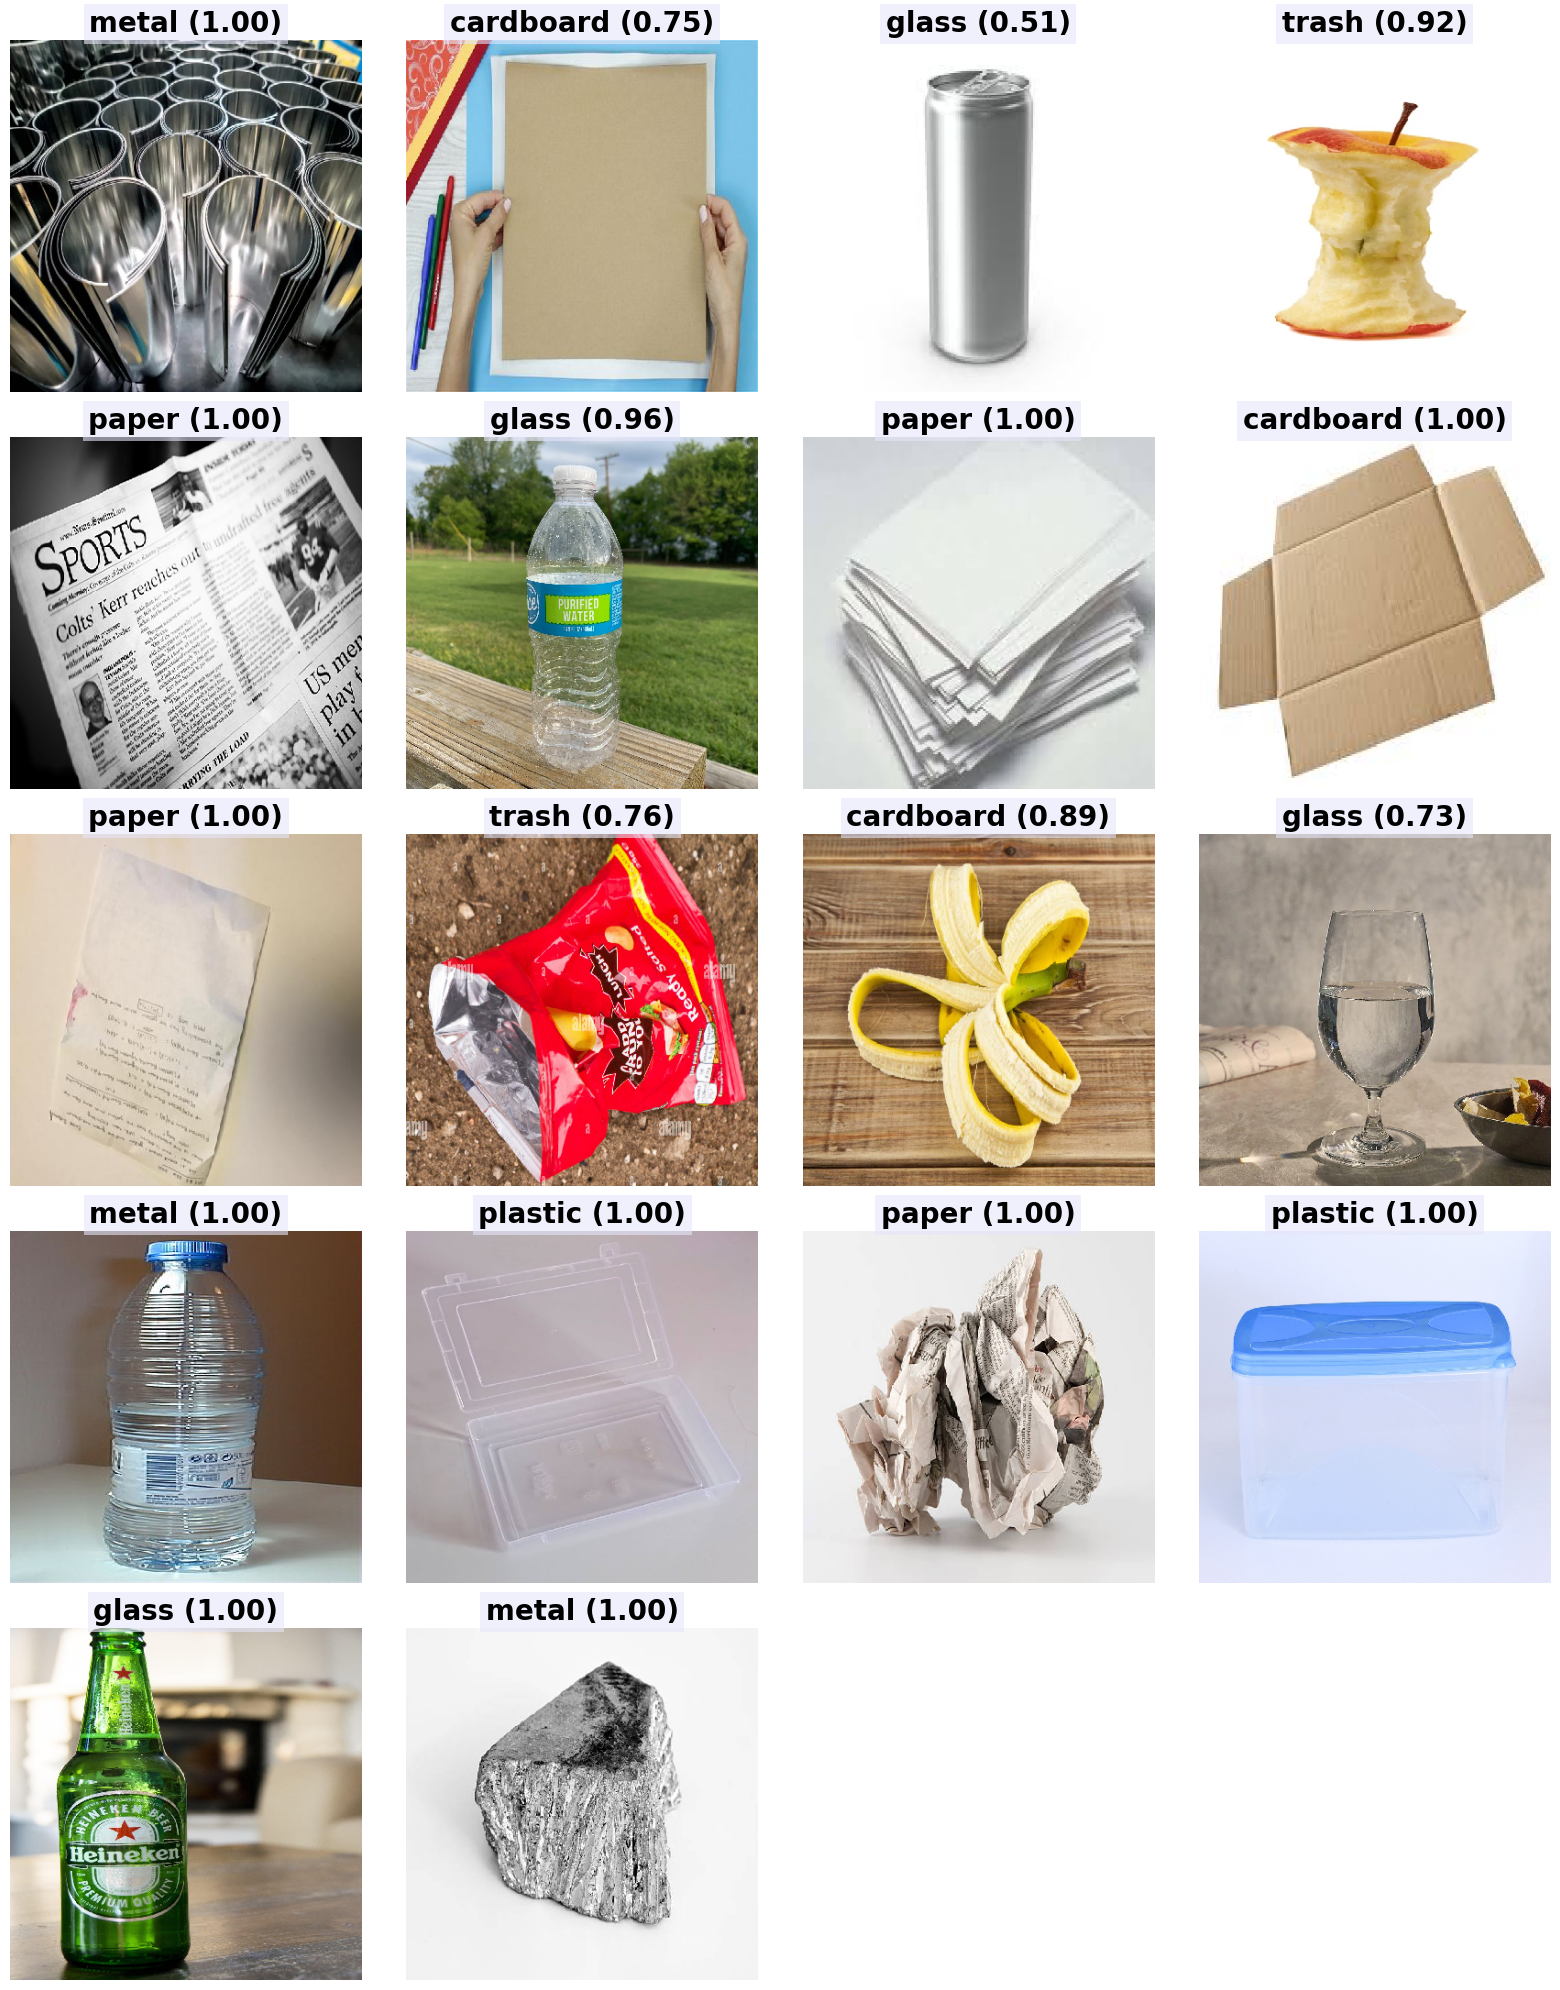

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load model
model = load_model("/kaggle/input/best-model-garbage/keras/default/1/best_garbage_model.h5")

# classes (same order as training generator)
class_names = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

# Folder containing test images
folder_path = "/kaggle/input/garbage-test-images"

# Function to predict and return label + confidence score
def predict_img(img_path):
    img = load_img(img_path, target_size=(384, 384))   # ResNet input size
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_array)
    class_index = np.argmax(preds)
    confidence = preds[0][class_index]

    return class_names[class_index], confidence


# Collect all images + predictions 
images = []
labels = []

for filename in os.listdir(folder_path):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(folder_path, filename)

        label, conf = predict_img(img_path)
        img = load_img(img_path, target_size=(384, 384))

        images.append(img)
        labels.append(f"{label} ({conf:.2f})")


# Subplot 4 images per row
num_images = len(images)
cols = 4
rows = (num_images + cols - 1) // cols   # Ceiling division

plt.figure(figsize=(16, rows * 4))

for i, (img, title) in enumerate(zip(images, labels)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(title, fontsize=20, fontweight="bold",
             bbox=dict(facecolor="lavender", alpha=0.6, edgecolor="none"))

plt.tight_layout()
plt.show()


# Inference

- The model classifies **metal, cardboard, paper,** and **trash** with high accuracy.
- It occasionally gets confused in classification of **plastic** and **glass**, likely because:
   - **High Visual Similarity** - Plastic and glass objects often share overlapping visual characteristics such as transparency, reflections, and smooth surfaces, making them inherently difficult to distinguish even for human observers.
   - **Insufficient Class-Specific Training Samples:** - The dataset contains insufficient or less diverse training samples for these classes, making it harder for a deep model like ResNet-50 to learn clear boundaries. For a deep architecture like ResNet-50, limited variation reduces the model’s ability to learn robust, discriminative features between classes.

Overall, the model performs well on clearly separable categories, while performance on visually similar materials can be further improved through dataset augmentation, or collecting additional high-variance samples for plastic and glass.